# Purpose


In [2]:
# imports
import numpy as np
import tifffile as tif
import matplotlib.pyplot as plt
import pandas as pd
import os, sys, glob
import SimpleITK as sitk

# this should actually be done in a notebook bc it isn't 100% accurate

# User inputs

In [ ]:
folder_of_tiffs = '/Users/emilydennis/Desktop/spimout/'
tiff_example = '/Users/emilydennis/Desktop/spimout/a253_reg_in_atl.tif'
csv_out = '/Users/emilydennis/Desktop/a253_reg_in_atl_out.csv'

# define functions

In [178]:
def get_max_points(tiff_path):
    tiff_file = tif.imread(tiff_path)
    index_tuple = np.unravel_index(np.argmax(tiff_file),tiff_file.shape)
    print(index_tuple)
    max_points =[tiff_path,index_tuple[0],index_tuple[1],index_tuple[2]]
    return max_points

In [181]:
def get_points_from_out_file(out_file):
    f=open(out_file,'r')
    data=[]
    for ff in f.readline().split('; '):
        if "OutputIndexMoving" in ff:
            for i in ff.split():
                if i.isdigit():
                    data.append(int(i))
    f.close()
    return data

# taking images and finding max values with manual checks 

In [168]:
folder_of_tiffs = '/Users/emilydennis/Desktop/spimout/'
list_of_tiffs = [file for file in os.listdir(folder_of_tiffs) if file[-4:]=='.tif']

In [179]:
max_indices = []
for file in list_of_tiffs:
    print(file)
    max_indices.append(get_max_points(os.path.join(folder_of_tiffs,file)))
max_df=pd.DataFrame(max_indices,columns=['file_name','index_0','index_1','index_2'])

e143_reg_in_atl.tif
(365, 541, 40)
h234_cell_to_reg.tif
(141, 627, 393)
e144_reg_in_atl.tif
(385, 533, 41)
a253_cell_to_reg.tif
(148, 629, 333)
e142_reg_in_atl.tif
(367, 551, 22)
e153_reg_in_atl.tif
(378, 710, 64)
h234_in_atl.tif
(366, 527, 23)
j316_reg_in_atl.tif
(483, 426, 151)
a253_reg_in_atl.tif
(276, 734, 101)
j319_reg_in_atl.tif
(370, 579, 46)
e144_cell_to_reg.tif
(18, 694, 342)
e143_cell_to_reg.tif
(40, 565, 400)
j319_cell_to_reg.tif
(130, 732, 372)
j316_cell_to_reg.tif
(126, 707, 335)
j317_reg_in_atl.tif
(387, 580, 58)
e142_cell_to_reg.tif
(133, 694, 355)
j317_cell_to_reg.tif
(106, 762, 331)
e153_cell_to_reg.tif
(133, 664, 329)


,file_name,index_0,index_1,index_2
0,/Users/emilydennis/Desktop/spimout/e143_reg_in...,365,541,40
1,/Users/emilydennis/Desktop/spimout/h234_cell_t...,141,627,393
2,/Users/emilydennis/Desktop/spimout/e144_reg_in...,385,533,41
3,/Users/emilydennis/Desktop/spimout/a253_cell_t...,148,629,333
4,/Users/emilydennis/Desktop/spimout/e142_reg_in...,367,551,22
5,/Users/emilydennis/Desktop/spimout/e153_reg_in...,378,710,64
6,/Users/emilydennis/Desktop/spimout/h234_in_atl...,366,527,23
7,/Users/emilydennis/Desktop/spimout/j316_reg_in...,483,426,151
8,/Users/emilydennis/Desktop/spimout/a253_reg_in...,276,734,101
9,/Users/emilydennis/Desktop/spimout/j319_reg_in...,370,579,46


In [180]:
max_df=pd.DataFrame(max_indices,columns=['file_name','index_0','index_1','index_2'])
max_df.to_csv('/Users/emilydennis/Desktop/cm2_max_indices.csv')

In [ ]:
max_df.insert(3,'transformixed_0',0)
max_df.insert(4,'transformixed_1',0)
max_df.insert(5,'transformixed_2',0)

for name in max_df.file_name:
    

In [10]:
j316=tif.imread('/Users/emilydennis/Desktop/spimout/j316_reg_in_atl.tif')

In [80]:
np.where(j316==1379)[1][0]

741

In [81]:
for i in np.sort(np.ravel(j316))[-40:]:
    print('i is {} and tuple {}'.format(i,np.where(j316==i)))

i is 1379 and tuple (array([127]), array([741]), array([212]))
i is 1384 and tuple (array([412]), array([565]), array([13]))
i is 1397 and tuple (array([381]), array([578]), array([27]))
i is 1418 and tuple (array([321]), array([1045]), array([149]))
i is 1423 and tuple (array([128]), array([741]), array([212]))
i is 1435 and tuple (array([410]), array([569]), array([13]))
i is 1436 and tuple (array([411]), array([567]), array([14]))
i is 1445 and tuple (array([409]), array([565]), array([16]))
i is 1453 and tuple (array([410]), array([565]), array([15]))
i is 1463 and tuple (array([409, 412]), array([570, 567]), array([14, 13]))
i is 1463 and tuple (array([409, 412]), array([570, 567]), array([14, 13]))
i is 1468 and tuple (array([411]), array([566]), array([14]))
i is 1482 and tuple (array([410]), array([567]), array([13]))
i is 1490 and tuple (array([410]), array([568]), array([14]))
i is 1491 and tuple (array([410]), array([566]), array([14]))
i is 1514 and tuple (array([322]), arr

# read csv

In [125]:
max_indices_df = pd.read_csv('/Users/emilydennis/Desktop/lightsheet/cm2_max_indices.csv')

max_indices_df=max_indices_df.drop(columns=['Unnamed: 0'])

In [119]:
max_in_atl_df = max_indices_df[max_indices_df.file_name.str.contains('atl.tif')]
max_in_reg_df = max_indices_df[max_indices_df.file_name.str.contains('to_reg')]

In [126]:
max_indices_df

,file_name,indices
0,e143_reg_in_atl.tif,"(365, 541, 40)"
1,h234_cell_to_reg.tif,"(141, 627, 393)"
2,e144_reg_in_atl.tif,"(385, 533, 41)"
3,a253_cell_to_reg.tif,"(148, 629, 333)"
4,e142_reg_in_atl.tif,"(367, 551, 22)"
5,e153_reg_in_atl.tif,"(378, 710, 64)"
6,h234_in_atl.tif,"(366, 527, 23)"
7,j316_reg_in_atl.tif,"(381, 578, 27)"
8,j319_reg_in_atl.tif,"(370, 579, 46)"
9,e144_cell_to_reg.tif,"(103,701,339)"


In [123]:
max_indices_df.indices[7] = '(381, 578, 27)'
max_indices_df.indices[9]='(103,701,339)'
max_indices_df.indices[10]='(85,568,394)'
max_indices_df.to_csv('/Users/emilydennis/Desktop/lightsheet/cm2_max_indices.csv')


(0.0, 1150.0)

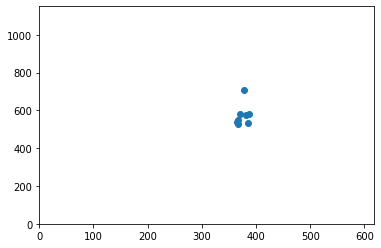

In [66]:
xs=[]
ys=[]
for locale in max_in_atl_df.indices:
    xs.append(eval(locale)[1])
    ys.append(eval(locale)[0])
plt.scatter(ys,xs)
plt.xlim([0,618])
plt.ylim([0,1150])
# from here, need to check j316_reg_in_atl -- manually 'fixed' j316_reg_in_atl
# e153_reg_in_atl had bad alignment! re-align (cerebellum stretched weird?)

In [67]:
max_in_reg_df.indices[9]='(103,701,339)'
max_in_reg_df.indices[10]='(85,568,394)'

/Users/emilydennis/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [68]:
max_in_reg_df
# pull down from spock reg:atl transform files
# for each filename, get base

,file_name,indices
1,h234_cell_to_reg.tif,"(141, 627, 393)"
3,a253_cell_to_reg.tif,"(148, 629, 333)"
9,e144_cell_to_reg.tif,"(103,701,339)"
10,e143_cell_to_reg.tif,"(85,568,394)"
11,j319_cell_to_reg.tif,"(130, 732, 372)"
12,j316_cell_to_reg.tif,"(126, 707, 335)"
14,e142_cell_to_reg.tif,"(133, 694, 355)"
15,j317_cell_to_reg.tif,"(106, 762, 331)"
16,e153_cell_to_reg.tif,"(133, 664, 329)"


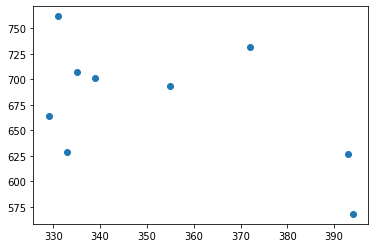

In [69]:


xs=[]
ys=[]
for locale in max_in_reg_df.indices:
    xs.append(eval(locale)[1])
    ys.append(eval(locale)[2])
plt.scatter(ys,xs)

# from here need to manually check e144_cell_to_reg and e143_cell_to_reg
# manual check revealed both blown out, skewing max vals

In [70]:
max_in_reg_df.insert(2,'adj_z',0)
max_in_reg_df.insert(3,'adj_y',0)
max_in_reg_df.insert(4,'adj_x',0)
max_in_reg_df.insert(2,'tz',0)
max_in_reg_df.insert(3,'ty',0)
max_in_reg_df.insert(4,'tx',0)

In [127]:
max_indices_df=max_indices_df.reset_index()

In [128]:
max_indices_df.insert(2,)

,index,file_name,indices
0,0,e143_reg_in_atl.tif,"(365, 541, 40)"
1,1,h234_cell_to_reg.tif,"(141, 627, 393)"
2,2,e144_reg_in_atl.tif,"(385, 533, 41)"
3,3,a253_cell_to_reg.tif,"(148, 629, 333)"
4,4,e142_reg_in_atl.tif,"(367, 551, 22)"
5,5,e153_reg_in_atl.tif,"(378, 710, 64)"
6,6,h234_in_atl.tif,"(366, 527, 23)"
7,7,j316_reg_in_atl.tif,"(381, 578, 27)"
8,8,j319_reg_in_atl.tif,"(370, 579, 46)"
9,9,e144_cell_to_reg.tif,"(103,701,339)"


# for loop

In [14]:
?os.rename

In [17]:
header='index\n'
numofpts = '1\n'
commonbase = '/Users/emilydennis/Desktop/spimout'

for i in max_indices_df.index:
    # for loop starts here
    indices = eval(max_indices_df.indices[i])[::-1] #switch z/x
    max_indices_df.tz[i]=indices[0]
    max_indices_df.ty[i]=indices[1]
    max_indices_df.tx[i]=indices[2]
    fullname=max_indices_df.file_name[i][:-4]
    nm=fullname[:4]
    mv=sitk.ReadImage(os.path.join(commonbase,max_indices_df.file_name[i]))
    filename = '/Users/emilydennis/Desktop/{}_pts.npy'.format(fullname)
    np.save(filename,eval(max_indices_df.indices[i])[::-1])
    
    ptslist = str(indices)[1:-1].split(',')
    pts = ptslist[0]+ptslist[1]+ptslist[2]+'\n'
    
    file_object = open(r"/Users/emilydennis/Desktop/spimout/{}_in.pts".format(nm),"a")
    for L in [header,numofpts,pts]: 
        file_object.write(L)
    file_object.close()
    
    transformixImageFilter = sitk.TransformixImageFilter()
    parameterMap0 = sitk.ReadParameterFile(os.path.join(commonbase,'{}/TransformParameters.0.txt').format(nm))
    transformixImageFilter.SetMovingImage(mv)
    transformixImageFilter.SetTransformParameterMap(parameterMap0)
    transformixImageFilter.SetOutputDirectory('/Users/emilydennis/Desktop/spimout/')
    transformixImageFilter.SetFixedPointSetFileName('/Users/emilydennis/Desktop/spimout/{}_in.pts'.format(nm))
    transformixImageFilter.Execute()
    os.rename('/Users/emilydennis/Desktop/spimout/outputpoints.txt','/Users/emilydennis/Desktop/spimout/{}_out.txt'.format(nm))

/Users/emilydennis/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/emilydennis/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/emilydennis/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [18]:
# for each element of max_in_reg_df get the indices
# get the transform files in spimout/h234 for ex
# transform points
# save in new columns

# first remember that images were transformed such that (x,y,z) becomes (z,y,x) 

In [79]:
for file in glob.glob('/Users/emilydennis/Desktop/spimout/*.txt'):
    print(file)
    with open(file,'r') as reader:
        print(file)

/Users/emilydennis/Desktop/spimout/e144_out.txt
/Users/emilydennis/Desktop/spimout/e144_out.txt
/Users/emilydennis/Desktop/spimout/j316_out.txt
/Users/emilydennis/Desktop/spimout/j316_out.txt
/Users/emilydennis/Desktop/spimout/j317_out.txt
/Users/emilydennis/Desktop/spimout/j317_out.txt
/Users/emilydennis/Desktop/spimout/h234_out.txt
/Users/emilydennis/Desktop/spimout/h234_out.txt
/Users/emilydennis/Desktop/spimout/e142_out.txt
/Users/emilydennis/Desktop/spimout/e142_out.txt
/Users/emilydennis/Desktop/spimout/e153_out.txt
/Users/emilydennis/Desktop/spimout/e153_out.txt
/Users/emilydennis/Desktop/spimout/e143_out.txt
/Users/emilydennis/Desktop/spimout/e143_out.txt
/Users/emilydennis/Desktop/spimout/j319_out.txt
/Users/emilydennis/Desktop/spimout/j319_out.txt
/Users/emilydennis/Desktop/spimout/a253_out.txt
/Users/emilydennis/Desktop/spimout/a253_out.txt


,index,file_name,indices,tz,ty,tx,adj_z,adj_y,adj_x
0,1,h234_cell_to_reg.tif,"(141, 627, 393)",0,0,0,0,0,0
1,3,a253_cell_to_reg.tif,"(148, 629, 333)",0,0,0,0,0,0
2,9,e144_cell_to_reg.tif,"(103,701,339)",0,0,0,0,0,0
3,10,e143_cell_to_reg.tif,"(85,568,394)",0,0,0,0,0,0
4,11,j319_cell_to_reg.tif,"(130, 732, 372)",0,0,0,0,0,0
5,12,j316_cell_to_reg.tif,"(126, 707, 335)",0,0,0,0,0,0
6,14,e142_cell_to_reg.tif,"(133, 694, 355)",0,0,0,0,0,0
7,15,j317_cell_to_reg.tif,"(106, 762, 331)",0,0,0,0,0,0
8,16,e153_cell_to_reg.tif,"(133, 664, 329)",0,0,0,0,0,0


In [136]:
# make into a for looping over _out.txt files and extracting info
alldata=[]
for file in glob.glob('/Users/emilydennis/Desktop/spimout/*_out.txt'):
    f=open(file,'r')
    data=[]
    for ff in f.readline().split('; '):
        if "OutputIndexMoving" in ff:
            for i in ff.split():
                if i.isdigit():
                    data.append(int(i))
    alldata.append([file,data[0],data[1],data[2]])
    f.close()

alldata_df=pd.DataFrame(alldata,columns=['filename','x','y','z'])

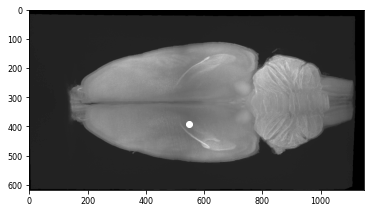

In [240]:
plt.imshow(np.max(mpra,axis=2),cmap='gray')
plt.scatter(alldata_df.y[4],alldata_df.x[3],c='w')

In [241]:
alldata_df

,filename,x,y,z
0,/Users/emilydennis/Desktop/spimout/e144_out.txt,351,237,342
1,/Users/emilydennis/Desktop/spimout/j316_out.txt,209,603,148
2,/Users/emilydennis/Desktop/spimout/j317_out.txt,217,606,179
3,/Users/emilydennis/Desktop/spimout/h234_out.txt,390,650,166
4,/Users/emilydennis/Desktop/spimout/e142_out.txt,240,547,185
5,/Users/emilydennis/Desktop/spimout/e153_out.txt,220,601,178
6,/Users/emilydennis/Desktop/spimout/e143_out.txt,250,571,145
7,/Users/emilydennis/Desktop/spimout/j319_out.txt,252,584,194
8,/Users/emilydennis/Desktop/spimout/a253_out.txt,190,596,87


In [242]:
h234_cell = tif.imread('/Users/emilydennis/Desktop/spimout/e142_cell_to_reg.tif')
h234_reg = tif.imread('/Users/emilydennis/Desktop/spimout/e142_reg_in_atl.tif')

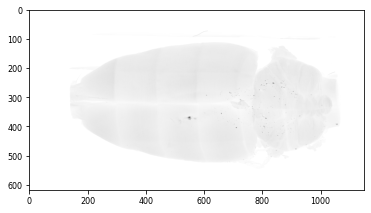

In [243]:
plt.imshow(np.max(h234_reg,axis=2),cmap='gray_r')

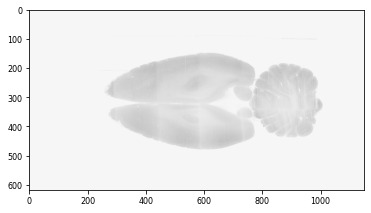

In [261]:
plt.imshow(h234_reg[:,:,70],cmap='gray_r')

In [5]:
x = pd.read_csv('/Users/emilydennis/Desktop/lightsheet/cm2_max_indices.csv')

In [29]:
for i in x.indices:
    print(eval(i))

(365, 541, 40)
(141, 627, 393)
(385, 533, 41)
(148, 629, 333)
(367, 551, 22)
(378, 710, 64)
(366, 527, 23)
(483, 426, 151)
(370, 579, 46)
(18, 694, 342)
(40, 565, 400)
(130, 732, 372)
(126, 707, 335)
(387, 580, 58)
(133, 694, 355)
(106, 762, 331)
(133, 664, 329)


In [35]:
testx = []
testy = []
testz = []

for i in x.indices:
    testx.append(eval(i)[0])
    testy.append(eval(i)[1])
    testz.append(eval(i)[2])

In [31]:
from mpl_toolkits import mplot3d

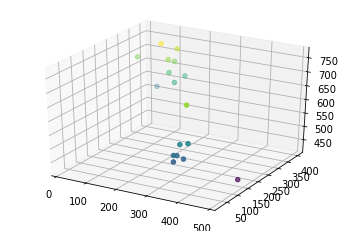

In [41]:
ax = plt.axes(projection='3d')
ax.scatter3D(testx,testz,testy,c=testy)

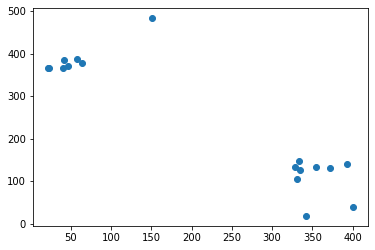

In [45]:
plt.scatter(testz,testx)

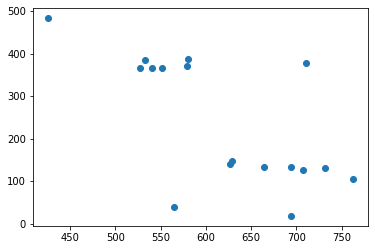

In [47]:
plt.scatter(testy,testx)

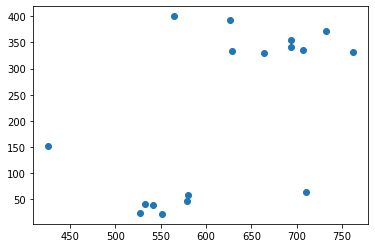

In [48]:
plt.scatter(testy,testz)

In [161]:
mpra=tif.imread('/Users/emilydennis/Desktop/lightsheet/mPRA_adj.tif')


,Unnamed: 0,file_name,indices
0,0,e143_reg_in_atl.tif,"(365, 541, 40)"
1,1,h234_cell_to_reg.tif,"(141, 627, 393)"
2,2,e144_reg_in_atl.tif,"(385, 533, 41)"
3,3,a253_cell_to_reg.tif,"(148, 629, 333)"
4,4,e142_reg_in_atl.tif,"(367, 551, 22)"
5,5,e153_reg_in_atl.tif,"(378, 710, 64)"
6,6,h234_in_atl.tif,"(366, 527, 23)"
7,7,j316_reg_in_atl.tif,"(483, 426, 151)"
8,8,j319_reg_in_atl.tif,"(370, 579, 46)"
9,9,e144_cell_to_reg.tif,"(18, 694, 342)"
